In [89]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df=pd.read_csv("Churn_Model_data.csv")

In [91]:
df.shape    # (9996, 12)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [92]:
df.drop(columns=['RowNumber','Surname'],inplace=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10002 non-null  int64  
 1   CreditScore      10002 non-null  int64  
 2   Geography        10001 non-null  object 
 3   Gender           10002 non-null  object 
 4   Age              10001 non-null  float64
 5   Tenure           10002 non-null  int64  
 6   Balance          10002 non-null  float64
 7   NumOfProducts    10002 non-null  int64  
 8   HasCrCard        10001 non-null  float64
 9   IsActiveMember   10001 non-null  float64
 10  EstimatedSalary  10002 non-null  float64
 11  Exited           10002 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 937.8+ KB


In [94]:
df.isnull().sum()

CustomerId         0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [95]:
df.dropna(how='any',inplace=True)

In [96]:
df.duplicated().sum()   #2
df.drop_duplicates(inplace=True)

In [97]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,1.569095e+07,650.503301,38.921071,5.013305,76476.263216,1.530212,0.705482,0.514906,100106.701248,0.203782
std,7.192840e+04,96.624668,10.488421,2.892353,62397.118820,0.581684,0.455849,0.499803,57513.314398,0.402829
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562855e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100238.110000,0.000000
75%,1.575323e+07,717.250000,44.000000,7.250000,127639.372500,2.000000,1.000000,1.000000,149400.107500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


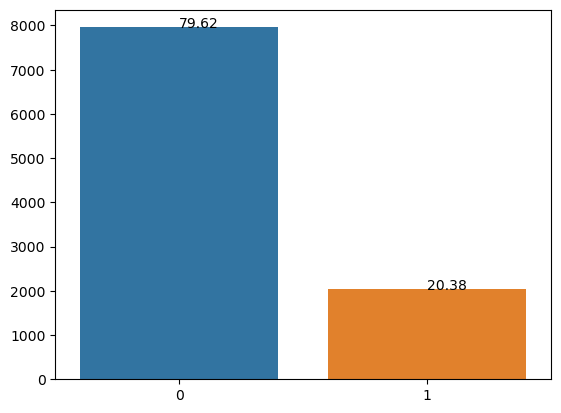

In [98]:
count=df['Exited'].value_counts()
sns.barplot(x=count.index, y=count.values)
for i, value in enumerate(count.values):
    plt.text(i, value,round(value/len(df['Exited'])*100,2))
plt.show()

In [99]:
df.corr()['Exited']

# AGE , BALANCE, ESTIMATED SALARY IS SOME RELATED TO EXITED (DIRECTLY PROPOTIONAL).....AGE MAX. RELATED

C:\Users\PATWA COMPUTER\AppData\Local\Temp\ipykernel_27040\4136404856.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Exited']


CustomerId        -0.006284
CreditScore       -0.026975
Age                0.285413
Tenure            -0.014092
Balance            0.118641
NumOfProducts     -0.047840
HasCrCard         -0.007120
IsActiveMember    -0.155969
EstimatedSalary    0.011955
Exited             1.000000
Name: Exited, dtype: float64

<Axes: ylabel='Geography'>

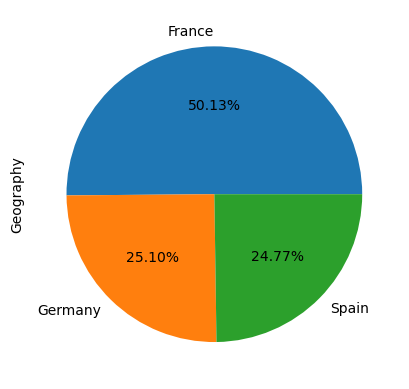

In [100]:
df['Geography'].value_counts().plot.pie(autopct='%1.2f%%')
# df['Gender'].value_counts().plot.pie(autopct='%1.2f%%') 

<Axes: ylabel='Geography'>

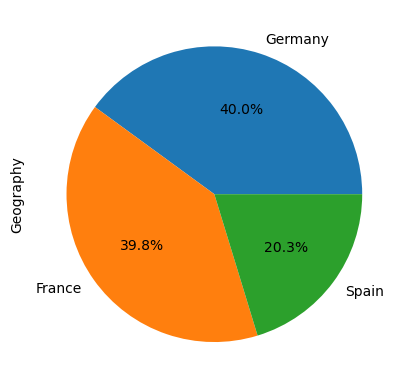

In [101]:
df[df['Exited']==1]['Geography'].value_counts().plot.pie(autopct='%1.1f%%')

# AFTER THIS PIE CHART WE CAN EASILY SEE THAT MOST(AROUND HALF) ACCOUNTS ARE FROM FRANCE AND GERMANY IS THE REASON
# FOR MAXIMUM CHURN

In [102]:
# sns.countplot(x='Gender',data=df, hue='Exited')

female_exited_percent = len(df[(df['Gender'] == 'Female') & (df['Exited'] == 1)])/len(df['Exited'])*100
male_exited_percent = len(df[(df['Gender'] == 'Male') & (df['Exited'] == 1)])/len(df['Exited'])*100

female_exited_percent , male_exited_percent

# THIS SHOWS THAT FEMALE ARE SLIGHTLY MORE LIKELY TO EXIT THAN MALE

(11.394557823129253, 8.98359343737495)

<Axes: xlabel='Age', ylabel='Count'>

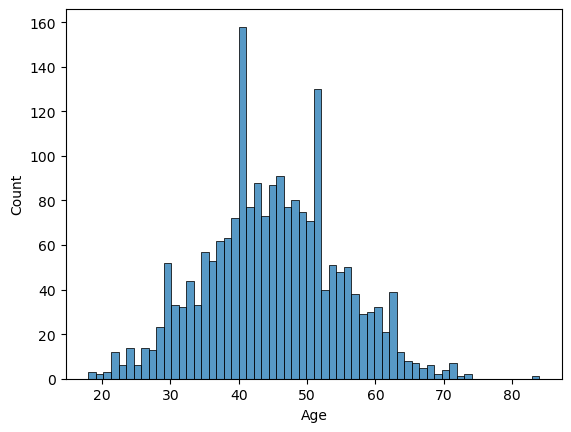

In [103]:
age_1 = df[df['Exited'] == 1]['Age']
sns.histplot(age_1,bins=60)

# WE CAN SEE BY COMPARING THAT THOSE WHO EXITED WERE MAXIMUMN FROM AGE 40 TO 60

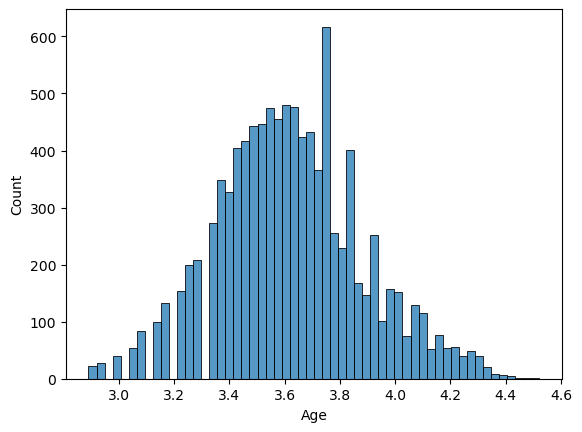

In [104]:
df['Age']=np.log(df['Age'])

sns.histplot(df['Age'], kde=False)
plt.show()

# AGE IS RIGHT SKEWED SO LOG TRANSFORM IT TO UNIFORMALLY DISTRIBUTED IT , FOR THE BETTER ACCURACY OF MODEL

<Axes: >

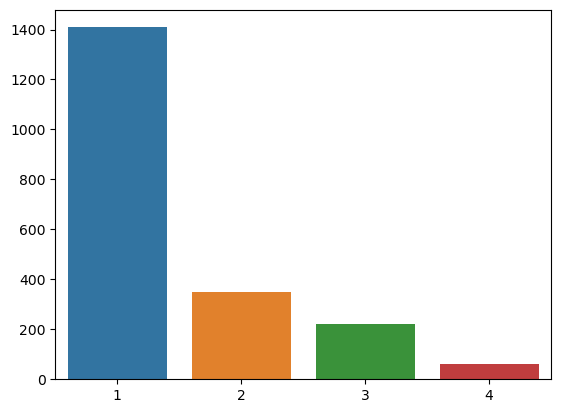

In [105]:
df['NumOfProducts'].nunique()    #4
product_counts = df[df['Exited'] == 1]['NumOfProducts'].value_counts()

sns.barplot(x=product_counts.index, y=product_counts.values)


27.73 % customers exited having 1 products
7.59 % customers exited having 2 products
82.71 % customers exited having 3 products
100.0 % customers exited having 4 products


Text(0.5, 1.0, 'Total customers with number of product count')

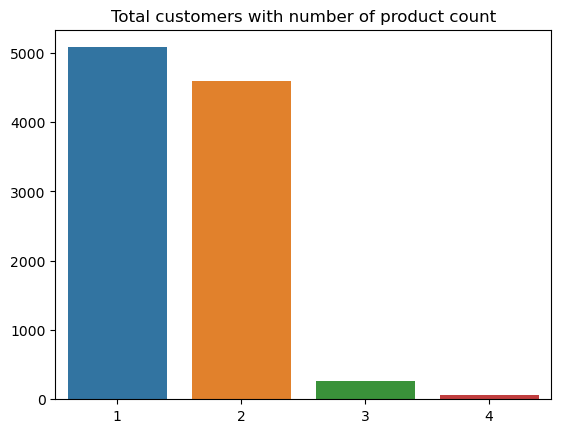

In [106]:
for i in range(1,5):
    percent= round(len(df[(df['Exited'] == 1) & (df['NumOfProducts'] == i)]) / len(df[df['NumOfProducts'] == i]) * 100,2)
    print(f"{percent} % customers exited having {i} products")

product_counts = df['NumOfProducts'].value_counts()

sns.barplot(x=product_counts.index, y=product_counts.values)
plt.title('Total customers with number of product count')


# FEWER PRODUCTS (like 1) INDICATE HIGHER CHANCES OF CUSTOMER CHURN , IMPORTANT COLUMN AS INPUT TO OUR MODEL 

In [107]:
df[df['Exited']==1]['Tenure'].value_counts()    # NO SUCH RELATION BETWEEN TENURE AND EXITED

1     232
3     213
9     213
5     209
4     203
2     201
8     197
6     196
7     177
10    101
0      95
Name: Tenure, dtype: int64

In [108]:
has_cr_and_exiting = len(df[(df['Exited']==1) & (df['HasCrCard']==1)]) / len(df['HasCrCard']) * 100
has_cr_and_exiting

#86 % people having cr are not exited , so no relation

14.245698279311725

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

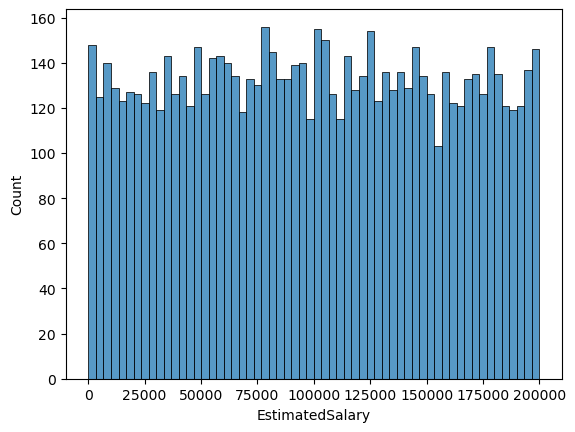

In [109]:
salary_1 = df[df['Exited'] == 0]['EstimatedSalary']
sns.histplot(salary_1,bins=60)

#salary is equally distributed so , no relation 

<Axes: xlabel='Exited', ylabel='CreditScore'>

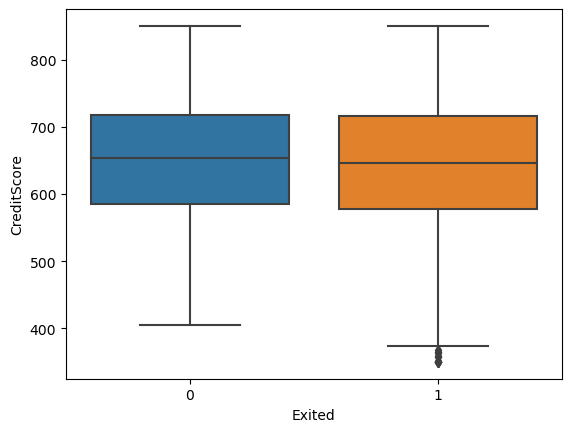

In [110]:
sns.boxplot(x='Exited', y='CreditScore', data=df)

# NO RELATION BETWEEN THEM 

C:\Users\PATWA COMPUTER\AppData\Local\Temp\ipykernel_27040\2146498351.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()<0.005,annot=True,cmap='coolwarm')


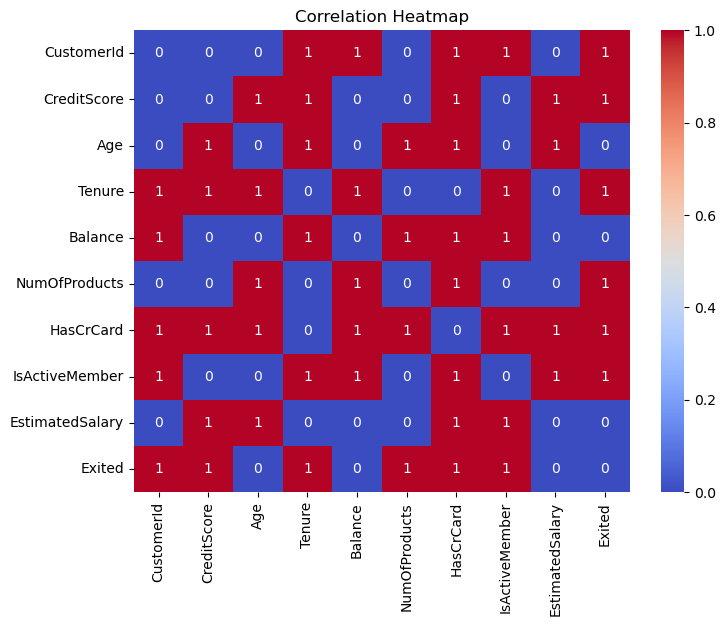

In [111]:
# transformed_salary = np.log(df['Age'])
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr()<0.005,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#HERE AGE AND BALANCE BOTH DIRECTLY PROP. TO EXITED AS 1  ,, AGE IS LOGICAL BUT BALANCE IS UNSOLVED 

In [112]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

X = df.drop(['Exited','Tenure','HasCrCard','EstimatedSalary','IsActiveMember','CustomerId','CreditScore'], axis=1)
y = df['Exited']

cat_cols = ['Geography', 'Gender']
X_encoded = pd.get_dummies(X, columns=cat_cols)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scaling feature
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = [
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC()
]

# Training each model with accuarcy
for i in models:
    classifier = i
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model:{i} Accuracy: {accuracy}")


Model:GradientBoostingClassifier() Accuracy: 0.8515
Model:RandomForestClassifier() Accuracy: 0.821
Model:LogisticRegression() Accuracy: 0.7945
Model:DecisionTreeClassifier() Accuracy: 0.7935
Model:SVC() Accuracy: 0.829


# SO WE CAN SEE THAT GRADIENT BOOSTING GIVES MAXIMUM ACCURACY OF 85.15 %

<!-- BELOW CODE CAN BE USED FOR PREDICTION -->

In [113]:
def predict():
    input_data = {
        'Geography': None,
        'Gender': None,
        'Age': None,
        'Balance': None,
        'NumOfProducts': None
    }

    for key in input_data.keys():
        if key == 'Geography':
            print('Only fill "France," "Germany," or "Spain"')
        input_data[key] = input(f"Enter value for {key}: ").capitalize()

    input_encoded = pd.DataFrame({
        'Age': [0],
        'Balance': [0],
        'NumOfProducts': [0],
        'Geography_France': [0],
        'Geography_Germany': [0],
        'Geography_Spain': [0],
        'Gender_Female': [0],
        'Gender_Male': [0]
    })

    for key, value in input_data.items():
        column_name = f'{key}_{value}'
        if column_name in input_encoded.columns:
            input_encoded[column_name] = 1

    input_scaled = scaler.transform(input_encoded)

    prediction = classifier.predict(input_scaled)

    if prediction == [1]:
        print("\nCustomer will leave")
    else:
        print("\nCustomer is happy")

In [114]:
predict()               # RUN THE CELL CODE TO PREDICT CUSTOMER CHURN

Only fill "France," "Germany," or "Spain"
Enter value for Geography: france
Enter value for Gender: male
Enter value for Age: 30
Enter value for Balance: 200000
Enter value for NumOfProducts: 2

Customer will leave
